In [41]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import nltk
from nltk.stem.snowball import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
import tqdm as notebook_tqdm
import googletrans
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [42]:
# Creating list to append tweet data to

tweets_list2 = []

# Using snscrape to get twitter content in indonesian

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#IPU144 lang:id since:2021-01-01 until:2022-10-01').get_items()):
        tweets_list2.append([tweet.content])

In [43]:
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Tweets'])

# Display first 5 entries from dataframe
tweets_df2.head()

,Tweets
0,International Parliamentary Union (IPU) ke-144...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,..."
2,Saya bersyukur sekarang ini semakin banyak mas...
3,"Sejak awal persidangan, Indonesia telah meneka..."
4,Bahagia sekali rasanya bisa ikut menorehkan se...


In [44]:
# removing link, symbol, and emoji. making new table remove_http

def remove(text):
   text = ' ' .join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
   return text
tweets_df2['remove_http'] = tweets_df2['Tweets'].apply(lambda x: remove(x))
tweets_df2.head()

,Tweets,remove_http
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...


In [45]:
# removing hashtag and RT from remove_http and making new column remove_hashtag

def remov(tweet):
   tweet = re.sub(r'\$\w*', '', tweet)
   tweet = re.sub(r'^RT[\s]+', '', tweet)
   tweet = re.sub(r'#', '', tweet)
   tweet = re.sub('[0-9]+', '', tweet)
   tweet = re.sub('@[A-Za-z0-9_]+', '', tweet) #removes @mentions
   return tweet
tweets_df2['remove_hashtag'] = tweets_df2['remove_http'].apply(lambda x: remov(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...,International Parliamentary Union IPU ke yang...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...,Awal tahun ini pada tanggal Maret Sofitel j...
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...,Sejak awal persidangan Indonesia telah menekan...
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...


In [46]:
# remove duplicate

tweets_df2.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweets_df2.head()

,Tweets,remove_http,remove_hashtag
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...,International Parliamentary Union IPU ke yang...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...,Awal tahun ini pada tanggal Maret Sofitel j...
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...,Sejak awal persidangan Indonesia telah menekan...
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...


In [47]:
# check column 

tweets_df2.shape

(346, 3)

In [48]:
#import NLTK and sastrawi

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiyeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# print indonesian stopwords and add more stopwords

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'kpd', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'dpt', 'dr', 'kpn',
    'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'gak', 'km', 'eh', 'sih',
    'bang', 'bro', 'sob', 'mas', 'mba', 'haha', 'wkwk', 'kmrn', 'iy', 'affa',
    'iyah', 'lho', 'sbnry', 'tuh', 'kzl', 'hahaha', 'weh', 'tuh'
]
data = stop_factory + more_stopwords
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)
print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [50]:
# stemming using sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
import string
from nltk.tokenize import TweetTokenizer
happy_emoticons = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':x', ':>', '=]', '8)',
    ':-D', ':D', ':^)', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D',
    '=D', '=-3', ':-))', ':-)', "-')", ':*', ':^*', '>:P', ':-P', ':P',
    'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)',
    '>:-)', '<3'
])
sad_emoticons = set([
    ':L', ':-/', '>:/', ':$', '>:[', ':@', ':-(', ':[', ':-||', '=L',
    ':<', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'(", ':\\', ':-c',
    ':c', ':(', '>:\\', ':('
])
all_emoticons = happy_emoticons.union(sad_emoticons)
def clean_tweets(tweet):
   tokenizer = TweetTokenizer(preserve_case=False,  
                             strip_handles=True,
                             reduce_len=True)
   tweet_tokens = tokenizer.tokenize(tweet)
   tweet_clean = []
   for word in tweet_tokens:
      if(word not in data and
         word not in all_emoticons and
         word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweet_clean.append(stem_word) 
  
   return tweet_clean

In [51]:
# applying stemming function

tweets_df2['Tweet'] = tweets_df2['remove_hashtag'].apply(lambda x: clean_tweets(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...,International Parliamentary Union IPU ke yang...,"[international, parliamentary, union, ipu, sel..."
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...,Awal tahun ini pada tanggal Maret Sofitel j...,"[awal, tahun, tanggal, maret, sofitel, jadi, t..."
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,"[syukur, sekarang, makin, banyak, masyarakat, ..."
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...,Sejak awal persidangan Indonesia telah menekan...,"[sejak, awal, sidang, indonesia, tekan, pentin..."
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,"[bahagia, sekali, rasa, ikut, toreh, sejarah, ..."


In [52]:
# join the sentences in tweet

def remove_punct(text):
   text = " ".join([char for char in text if char not in string.punctuation])
   return text

In [53]:
# applying previous function

tweets_df2['Tweet'] = tweets_df2['Tweet'].apply(lambda x: remove_punct(x))
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...,International Parliamentary Union IPU ke yang...,international parliamentary union ipu selengga...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...,Awal tahun ini pada tanggal Maret Sofitel j...,awal tahun tanggal maret sofitel jadi tuan rum...
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,syukur sekarang makin banyak masyarakat gemar ...
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...,Sejak awal persidangan Indonesia telah menekan...,sejak awal sidang indonesia tekan penting pera...
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,bahagia sekali rasa ikut toreh sejarah bangun ...


In [54]:
# remove blank tweet (optional)

tweets_df2 = tweets_df2[tweets_df2['Tweet'] != '']
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...,International Parliamentary Union IPU ke yang...,international parliamentary union ipu selengga...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...,Awal tahun ini pada tanggal Maret Sofitel j...,awal tahun tanggal maret sofitel jadi tuan rum...
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,syukur sekarang makin banyak masyarakat gemar ...
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...,Sejak awal persidangan Indonesia telah menekan...,sejak awal sidang indonesia tekan penting pera...
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,bahagia sekali rasa ikut toreh sejarah bangun ...


In [55]:
#sorted index 

tweets_df2 = tweets_df2.reset_index(drop=True)
tweets_df2.head()

,Tweets,remove_http,remove_hashtag,Tweet
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...,International Parliamentary Union IPU ke yang...,international parliamentary union ipu selengga...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...,Awal tahun ini pada tanggal Maret Sofitel j...,awal tahun tanggal maret sofitel jadi tuan rum...
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,syukur sekarang makin banyak masyarakat gemar ...
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...,Sejak awal persidangan Indonesia telah menekan...,sejak awal sidang indonesia tekan penting pera...
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,bahagia sekali rasa ikut toreh sejarah bangun ...


In [56]:
# showed clean data

tweets_df2.drop_duplicates(subset="remove_hashtag", keep="first", inplace=True)
tweets_df2.head(10)

,Tweets,remove_http,remove_hashtag,Tweet
0,International Parliamentary Union (IPU) ke-144...,International Parliamentary Union IPU ke 144 y...,International Parliamentary Union IPU ke yang...,international parliamentary union ipu selengga...
1,"Awal tahun ini, pada tanggal 20-24 Maret 2022,...",Awal tahun ini pada tanggal 20 24 Maret 2022 S...,Awal tahun ini pada tanggal Maret Sofitel j...,awal tahun tanggal maret sofitel jadi tuan rum...
2,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,Saya bersyukur sekarang ini semakin banyak mas...,syukur sekarang makin banyak masyarakat gemar ...
3,"Sejak awal persidangan, Indonesia telah meneka...",Sejak awal persidangan Indonesia telah menekan...,Sejak awal persidangan Indonesia telah menekan...,sejak awal sidang indonesia tekan penting pera...
4,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,Bahagia sekali rasanya bisa ikut menorehkan se...,bahagia sekali rasa ikut toreh sejarah bangun ...
5,"Pasca IPU ke 144, BKSAP DPR bakal bentuk ‘gugu...",Pasca IPU ke 144 BKSAP DPR bakal bentuk gugus ...,Pasca IPU ke BKSAP DPR bakal bentuk gugus tug...,pasca ipu bksap dpr bakal bentuk gugus tugas d...
6,"Dalam jangka panjang, semoga hal ini mampu men...",Dalam jangka panjang semoga hal ini mampu meni...,Dalam jangka panjang semoga hal ini mampu meni...,jangka panjang moga mampu tingkat potensi umkm...
7,Saya ucapkan terima kasih atas kunjungan Presi...,Saya ucapkan terima kasih atas kunjungan Presi...,Saya ucapkan terima kasih atas kunjungan Presi...,ucap terima kasih atas kunjung presiden sekjen...
8,RT @puanmaharani_ri: Indonesia telah sukses me...,RT ri Indonesia telah sukses menyelenggarakan ...,ri Indonesia telah sukses menyelenggarakan IPU...,ri indonesia sukses selenggara ipu nusa bal mo...
9,"Prokes IPU di Bali Dipuji WHO, Puan: Berkat Go...",Prokes IPU di Bali Dipuji WHO Puan Berkat Goto...,Prokes IPU di Bali Dipuji WHO Puan Berkat Goto...,prokes ipu bal puji who puan berkat gotong roy...


In [57]:
# remove column except Tweets

tweets_df2.drop(tweets_df2.columns[[0, 1, 2]], axis=1, inplace=True)
tweets_df2.head()

,Tweet
0,international parliamentary union ipu selengga...
1,awal tahun tanggal maret sofitel jadi tuan rum...
2,syukur sekarang makin banyak masyarakat gemar ...
3,sejak awal sidang indonesia tekan penting pera...
4,bahagia sekali rasa ikut toreh sejarah bangun ...


In [58]:
# import to csv

tweets_df2.to_csv('clean_ipu.csv', encoding='utf8', index=False)

In [59]:
# read csv

df = pd.read_csv('clean_ipu.csv')
df.head()

,Tweet
0,international parliamentary union ipu selengga...
1,awal tahun tanggal maret sofitel jadi tuan rum...
2,syukur sekarang makin banyak masyarakat gemar ...
3,sejak awal sidang indonesia tekan penting pera...
4,bahagia sekali rasa ikut toreh sejarah bangun ...


In [60]:
# translate indonesian text to english

translator = Translator()
translations = {}
for column in df.columns:
   unique_elements = df[column].unique()
   for element in unique_elements:
      translations[element] = translator.translate(element).text
translations

{'international parliamentary union ipu selenggara nusa bal tanggal maret inidiplomasi indonesianway rintiskemajuan ipu ri': 'IPU International Parliamentary Union will be held in Nusa Bal this March',
 'awal tahun tanggal maret sofitel jadi tuan rumah inter parliamentary union inaugural gala dinner ipu diballroom tepi pantai gamelan ballroom': 'the beginning of the year March sofitel to host the inter parliamentary union inaugural gala dinner Ipu in the beachfront gamelan ballroom',
 'syukur sekarang makin banyak masyarakat gemar beli produk lokal bagai daerah ini bentuk gotong royong jadi ciri khas masyarakat indonesia ipu umkm wastranusantara solusipuan': 'thankfully, now more and more people like to buy local products, like this area, the form of gotong royong is a hallmark of the Indonesian people IPU UMKM Wastranusantara Solusipuan',
 'sejak awal sidang indonesia tekan penting peran sentral ipu cari solusi isu ukraina imbang depan hormat hukum internasional integritas daulat wila

In [61]:
# replace translation to Tweet column

df.replace(translations, inplace=True)
df.head(10)

,Tweet
0,IPU International Parliamentary Union will be ...
1,the beginning of the year March sofitel to hos...
2,"thankfully, now more and more people like to b..."
3,"Since the beginning of the session, Indonesia ..."
4,I am very happy to participate in making histo...
5,Post-IPU BKSAP DPR will form peace task force ...
6,"In the long term, I hope that the potential le..."
7,"thank you for the visit of the president, secr..."
8,ri indonesia successfully held the ipu nusa ba...
9,prokes ipu bal praises who madam thanks to the...


In [62]:
# export to csv

df.to_csv('translation_ipu.csv', encoding='utf8', index=False)

In [63]:
# checking the data

def load_data():
   data = pd.read_csv('translation_ipu.csv')
   return data
tweet_df = load_data()
tweet_df.head()

,Tweet
0,IPU International Parliamentary Union will be ...
1,the beginning of the year March sofitel to hos...
2,"thankfully, now more and more people like to b..."
3,"Since the beginning of the session, Indonesia ..."
4,I am very happy to participate in making histo...


In [64]:
# calculate polarity

scores = [analyser.polarity_scores(x) for x in tweet_df['Tweet']]
scores

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.7951},
 {'neg': 0.045, 'neu': 0.752, 'pos': 0.203, 'compound': 0.7783},
 {'neg': 0.045, 'neu': 0.549, 'pos': 0.406, 'compound': 0.9501},
 {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5423},
 {'neg': 0.061, 'neu': 0.859, 'pos': 0.08, 'compound': 0.1779},
 {'neg': 0.056, 'neu': 0.763, 'pos': 0.181, 'compound': 0.5994},
 {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.8625},
 {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.743},
 {'neg': 0.053, 'neu': 0.673, 'pos': 0.274, 'compound': 0.802},
 {'neg': 0.06, 'neu': 0.759, 'pos': 0.182, 'compound': 0.6705},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.5423},
 {'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.5267},
 {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.3612},
 {'neg

In [65]:
# make the result column

tweet_df['Compound_Score'] = [x['compound'] for x in scores]
tweet_df.head()

,Tweet,Compound_Score
0,IPU International Parliamentary Union will be ...,0.0000
1,the beginning of the year March sofitel to hos...,0.0000
2,"thankfully, now more and more people like to b...",0.7951
3,"Since the beginning of the session, Indonesia ...",0.7783
4,I am very happy to participate in making histo...,0.9501


In [66]:
# add sentiments

tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,IPU International Parliamentary Union will be ...,0.0000,Netral
1,the beginning of the year March sofitel to hos...,0.0000,Netral
2,"thankfully, now more and more people like to b...",0.7951,Positif
3,"Since the beginning of the session, Indonesia ...",0.7783,Positif
4,I am very happy to participate in making histo...,0.9501,Positif


In [67]:
# export csv

tweet_df.to_csv('classification_ipu_sentiment.csv', encoding='utf8', index=False)

In [68]:
def load_data():
   data = pd.read_csv('classification_ipu_sentiment.csv')
   return data
tweet_df = load_data()
tweet_df.head()

,Tweet,Compound_Score,Sentiments
0,IPU International Parliamentary Union will be ...,0.0000,Netral
1,the beginning of the year March sofitel to hos...,0.0000,Netral
2,"thankfully, now more and more people like to b...",0.7951,Positif
3,"Since the beginning of the session, Indonesia ...",0.7783,Positif
4,I am very happy to participate in making histo...,0.9501,Positif


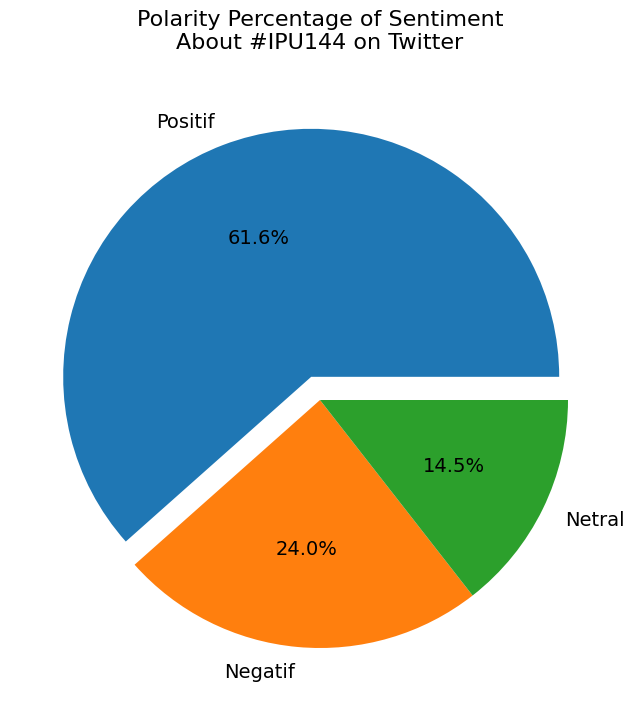

<Figure size 640x480 with 0 Axes>

In [69]:
# visualization pie chart

fig, ax = plt.subplots(figsize = (8, 10))
sizes = [count for count in tweet_df['Sentiments'].value_counts()]
labels = list(tweet_df['Sentiments'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Polarity Percentage of Sentiment\nAbout #IPU144 on Twitter', fontsize = 16, pad = 30)
fig.set_facecolor('white')
plt.show()
plt.savefig('pie_chart.png')

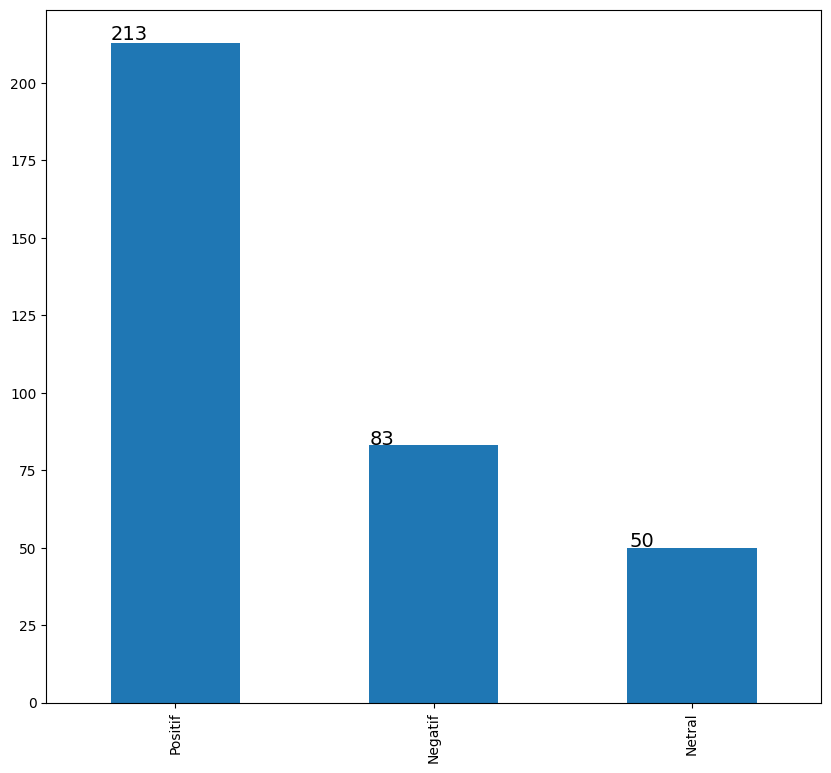

<Figure size 640x480 with 0 Axes>

In [70]:
# visualization plot bar

s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar(figsize = (10, 9))
plt.rcParams['axes.facecolor'] = 'white'
for p in ax.patches:
   ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
plt.show()
plt.savefig('bar_chart.png')

In [71]:
# calculate sentiment total

negative_sentiment = (tweet_df['Sentiments'] == 'Negatif').sum()
print("The number of negative sentiments is:\t", negative_sentiment)
positive_sentiment = (tweet_df['Sentiments'] == 'Positif').sum()
print("The number of positive sentiments is:\t", positive_sentiment)
neutral_sentiment = (tweet_df['Sentiments'] == 'Netral').sum()
print("The number of neutral sentiments is:\t", neutral_sentiment)
total = len(tweet_df.index)
print("The overall total of sentiments is:\t", total)

The number of negative sentiments is:	 83
The number of positive sentiments is:	 213
The number of neutral sentiments is:	 50
The overall total of sentiments is:	 346


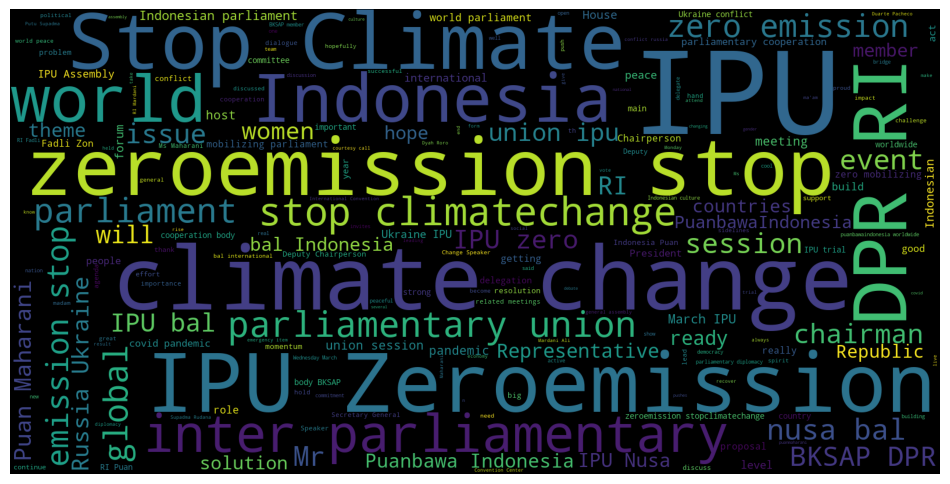

<Figure size 640x480 with 0 Axes>

In [72]:
# make wordcloud

text = " ".join(tweet for tweet in tweet_df['Tweet'])
word_cloud = WordCloud(width=1600, height=800, max_font_size=200,
                       background_color='black').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')